In [1]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('yelp.csv')

In [5]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [13]:
#sns.FacetGrid(data=df,row=len('text'), col='stars' )
df['text'].apply(len).head(5)

0     889
1    1345
2      76
3     419
4     469
Name: text, dtype: int64

In [23]:
df['text length'] = df['text'].apply(len)

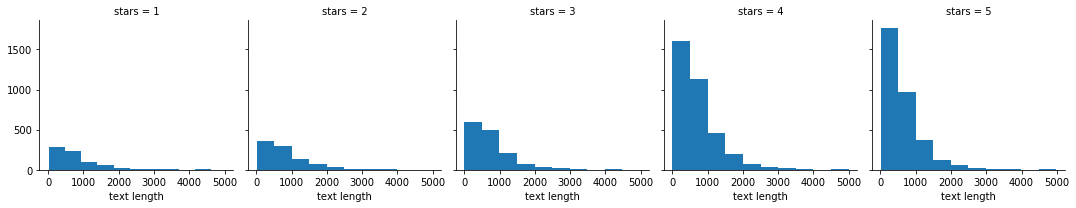

In [25]:
g = sns.FacetGrid(data=df, col='stars')
g = g.map(plt.hist,'text length')

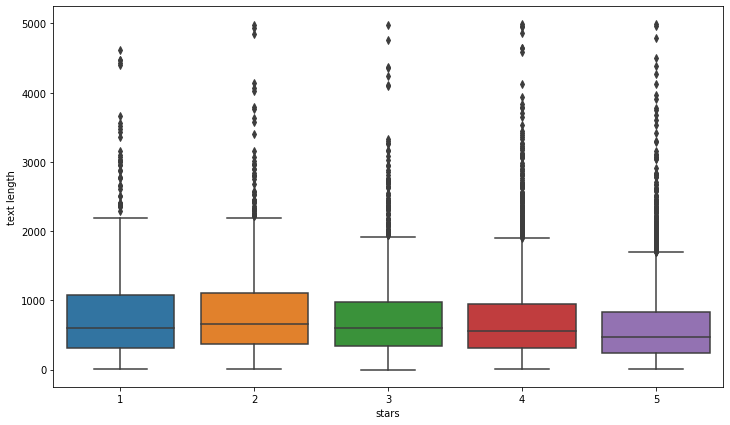

In [27]:
plt.figure(figsize=(12,7))
sns.boxplot(x='stars', y='text length', data=df)

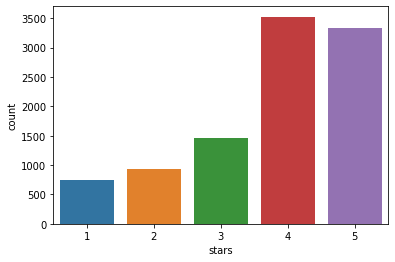

In [28]:
sns.countplot(x='stars',data=df)

In [29]:
df.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


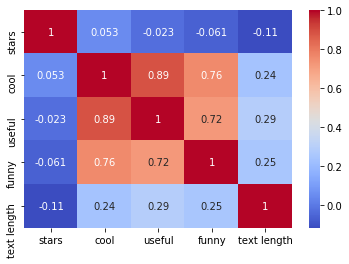

In [33]:
sns.heatmap(data=df.corr(),  annot = True, cmap = 'coolwarm')

In [42]:
 yelp_class  = df[(df['stars']==1) | (df['stars']==5)]

In [45]:
yelp_class.head(20)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186
10,AsSCv0q_BWqIe3mX2JqsOQ,2010-06-16,E11jzpKz9Kw5K7fuARWfRw,5,The oldish man who owns the store is as sweet ...,review,-OMlS6yWkYjVldNhC31wYg,1,3,1,298
11,e9nN4XxjdHj4qtKCOPq_vg,2011-10-21,3rPt0LxF7rgmEUrznoH22w,5,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0,321
12,h53YuCiIDfEFSJCQpk8v1g,2010-01-11,cGnKNX3I9rthE0-TH24-qA,5,They have a limited time thing going on right ...,review,UPtysDF6cUDUxq2KY-6Dcg,1,2,0,433
17,O510Re68mOy9dU490JTKCg,2010-05-03,j4SIzrIy0WrmW4yr4--Khg,5,okay this is the best place EVER! i grew up sh...,review,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0,363


In [54]:
X=yelp_class['text']
y=yelp_class['stars']


In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [57]:
X = cv.fit_transform(X)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
 X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
nb = MultinomialNB()

In [62]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
predictions = nb.predict(X_test)

In [122]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       181
           5       0.98      0.93      0.96      1045

    accuracy                           0.93      1226
   macro avg       0.84      0.91      0.87      1226
weighted avg       0.94      0.93      0.93      1226



In [70]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [76]:
mypipline = Pipeline([('bow', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('classifier', MultinomialNB())])

In [77]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [78]:
mypipline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [79]:
predictions1 = mypipline.predict(X_test)

In [80]:
print(classification_report(predictions1, y_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           5       1.00      0.81      0.90      1226

    accuracy                           0.81      1226
   macro avg       0.50      0.41      0.45      1226
weighted avg       1.00      0.81      0.90      1226



D:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
import string

In [83]:
rev_one_string = "Hello world !! Hi there.. this is vinay"
rev_one_string = [c for c in rev_one_string if c not in string.punctuation]

print(rev_one_string)

['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', ' ', ' ', 'H', 'i', ' ', 't', 'h', 'e', 'r', 'e', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 'v', 'i', 'n', 'a', 'y']


In [84]:
rev_one_string =''.join(rev_one_string)
print(rev_one_string)

Hello world  Hi there this is vinay


In [86]:
import string
from nltk.corpus import stopwords


In [87]:
rev_one_string = [word for word in rev_one_string.split() if word.lower() not in stopwords.words('English')]
print(rev_one_string)

['Hello', 'world', 'Hi', 'vinay']


In [88]:
rev_one_string =' '.join(rev_one_string)
print(rev_one_string)

Hello world Hi vinay


In [97]:
import re

In [98]:
def removeNumerics(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    return list

In [99]:
lst =['31st', '111','Vinay99','Y2K']
removeNumerics(lst)

['st', '', 'Vinay', 'YK']

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
mypipline1 = Pipeline([('bow', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('classifier', RandomForestClassifier(n_estimators=200))])

In [118]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [119]:
mypipline1.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [120]:
perdict3 = mypipline1.predict(X_test)

In [121]:
print(classification_report(perdict3, y_test))

              precision    recall  f1-score   support

           1       0.20      1.00      0.33        45
           5       1.00      0.85      0.92      1181

    accuracy                           0.85      1226
   macro avg       0.60      0.92      0.62      1226
weighted avg       0.97      0.85      0.89      1226



In [123]:
print(confusion_matrix(perdict3, y_test))

[[ 45   0]
 [183 998]]


In [124]:
print(confusion_matrix(predictions, y_test))

[[159  22]
 [ 69 976]]
